## 1. Import Libraries for Classifying Data with Algorithms and Load Dataset

In [80]:
"""
Meng-import beberapa library dari bahasa pemrograman python yang bertujuan untuk melakukan
tahap pembagian data menjadi training dan testing, normalisasi data serta pemodelan dengan beberapa Algoritma Machine Learning
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fast")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [81]:
# Memanggil file dataset yang telah dilakukan proses preprocessing dan disimpan di dalam variabel DataFrame baru
data_modelling = pd.read_csv("../Dataset/Patient Treatment Data after Preprocessed.csv")

data_modelling.head(13)

,Hematocrit,Hemoglobin,Erythrocyte,Leucocyte,Thrombocyte,Mch,Mchc,Mcv,Age,Sex,Status
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,1
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,1
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,1
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,1
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,1
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,1,1
6,31.1,8.7,5.06,11.1,416,17.2,28.0,61.5,1,0,1
7,40.3,13.3,4.73,8.1,257,28.1,33.0,85.2,1,0,1
8,33.6,11.5,4.54,11.4,262,25.3,34.2,74.0,1,0,1
9,35.4,11.4,4.80,2.6,183,23.8,32.2,73.8,1,0,1


## 2. Split the Data into Training and Testing then Create Normalization Data

Sebelum melakukan pemodelan dengan beberapa Algoritma Machine Learning (Regresi Logistik, Decision Tree, SVM, KNN, Naive Bayes, Ensemble Stacking dan Ensemble Vote), saya akan melakukan sedikit data pre-processing yaitu mlakukan penyeleksian kolom data yang akan dijadikan sebagai variabel independen/variabel x dan variabel dependen/variabel y serta melakukan tahap split validation yang dimana nantinya keutuhan data di dalam variabel DataFrame data_modelling akan terbagi menjadi 2 jenis data yaitu data training dan data testing yang kemudian data-data tersebut akan dinormalisasikan/diskalakan dengan salah satu teknik feature scaling yaitu StandardScaler.

Kolom-kolom yang akan menjadi variabel independen/variabel x adalah kolom "Hematocrit", "Hemoglobin", "Erythrocyte", "Leucocyte", "Thrombocyte", "Mch", "Mchc", "Mcv", "Age" dan "Sex". Sedangkan kolom yang akan menjadi variabel dependen/variabel y adalah kolom "Status" yang merupakan kolom label output dengan 2 data unik yaitu 0 (pasien rawat inap) dan 1 (pasien rawat jalan).

In [82]:
# Melakukan penyeleksian kolom data dari variabel DataFrame data_modelling menjadi variabel x dan variabel y
x = data_modelling.drop(["Status"], axis=1)

y = data_modelling["Status"]

In [83]:
# Menampilkan data-data yang ada di dalam variabel independen/variabel x sebanyak 7 data teratas
x.head(7)

,Hematocrit,Hemoglobin,Erythrocyte,Leucocyte,Thrombocyte,Mch,Mchc,Mcv,Age,Sex
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,1
6,31.1,8.7,5.06,11.1,416,17.2,28.0,61.5,1,0


In [84]:
# Menampilkan jumlah data yang dimiliki oleh variabel independen (x) sebelum dilakukan proses split
print("Jumlah Data yang ada Didalam Variabel Independen (Variabel X) adalah", len(x))

Jumlah Data yang ada Didalam Variabel Independen (Variabel X) adalah 4412


In [85]:
# Menampilkan data-data yang ada di dalam variabel dependen/variabel y sebanyak 53 data terbawah
y.tail(53)

4359    0
4360    0
4361    0
4362    1
4363    1
4364    1
4365    1
4366    1
4367    0
4368    0
4369    0
4370    0
4371    0
4372    0
4373    1
4374    1
4375    0
4376    0
4377    0
4378    0
4379    0
4380    0
4381    0
4382    1
4383    1
4384    0
4385    0
4386    0
4387    0
4388    0
4389    0
4390    0
4391    0
4392    0
4393    0
4394    1
4395    1
4396    0
4397    1
4398    0
4399    1
4400    1
4401    1
4402    1
4403    0
4404    0
4405    0
4406    0
4407    0
4408    0
4409    1
4410    0
4411    1
Name: Status, dtype: int64

In [86]:
# Menampilkan jumlah data yang dimiliki oleh variabel dependen (x) sebelum dilakukan proses split
print("Jumlah Data yang ada Didalam Variabel Dependen (Variabel Y) adalah", len(y))

Jumlah Data yang ada Didalam Variabel Dependen (Variabel Y) adalah 4412


Walaupun keutuhan data dari variabel DataFrame data_modelling telah terkelompok menjadi 2 bagian yang dimana 10 kolom ada di dalam variabel independen (variabel x) dan 1 kolom ada di dalam variabel dependen (variabel y), tetapi jumlah data yang dimiliki tetaplah sama yaitu 4.412. Jumlah data tersebut tidak mengalami penurunan/penambahan sebab pada saat di tahapan data preprocessing, saya tidak mengurangi jumlah data ataupun menambahnya.

Selain itu, jumlah data tersebut (4.412) akan terbagi ke dalam 4 kategori variabel yaitu variabel independen (x) yang bertugas untuk melatih (training) Algoritma Machine Learning, variabel independen (x) tetapi bertugas untuk menguji (testing) algoritma. Lalu juga terdapat variabel dependen (y) yang bertujuan untuk melatih (training) Algoritma Machine Learning dengan data-data yang nantinya akan dikenali dan variabel dependen (y) yang bertujuan untuk menguji (testing) algoritma yang sebelumnya sudah dilatih dengan diberikan data-data baru yang belum dikenali.

In [87]:
"""
Membagi variabel independen dan dependen menjadi 2 jenis data yaitu data training (train) dan data testing (test). Proses
membagi data di kedua variabel ini memanfaatkan teknik split data dengan metode Split Validation.
Split validation merupakan salah satu teknik validasi yang membagi dataset menjadi 2 bagian data yaitu data training
dan data testing dengan nilai proporsi yang ditentukan seperti 30 untuk data testing dan 70 untuk data training,
20 untuk data testing dan 80 untuk data training, atau 40 untuk data testing dan 60 untuk data training.
"""

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=38)

Berikut adalah penjelasan dari proses split validation:

1. x: Merupakan sebuah variabel independen atau variabel yang mempengaruhi/menjadi sebab utama dalam perubahan dari variabel dependen. Dalam pengujian kali ini, kolom-kolom yang mempengaruhi variabel y/variabel dependen adalah kolom "Hematocrit", "Hemoglobin", "Erythrocyte", "Leucocyte", "Thrombocyte", "Mch", "Mchc", "Mcv", "Age" dan "Sex".
2. y: Merupakan sebuah variabel dependen atau variabel yang dipengaruhi variabel independen/variabel x. Berubahnya data yang ada di dalam variabel dependen adalah disebabkan karena berubahnya data di variabel independen/variabel x. Variabel y juga biasa dikenal sebagai label prediksi/label output jika permasalahannya adalah mengklasifikasikan data. Dalam pengujian ini, label outputnya adalah kolom "Status".
3. test_size: Nilai presentase atau nilai proporsi dalam pembagian data menjadi data training dan data testing. Dalam pengujian ini saya memakai nilai presentase test_size sebesar 0.3 yang dimana ukuran dari data test mencapai 20% dan data train mencapai 80%.
4. random_state: Fungsi ini berfungsi untuk menetapkan nilai supaya ketika setiap kali codingan dijalankan maka nilai yang ada di data training dan data testing akan selalu tetap dan nilainya dan tidak berubah-ubah sedangkan jika di proses split validation ini tidak menetapkan nilai random_state maka setiap codingan dijalankan maka nilai baru akan teracak kembali di data training dan data testing sehingga akan memiliki nilai yang berbeda-beda setiap saat codingan dijalankan. Dalam menetapkan nilai random_state tidak ada ketentuan nilai yang pasti (bebas menentukan nilai bilangan bulat) namun dalam pengujian ini saya menetapkan nilai 38 di random_state.


Selain keempat penjelasan tersebut terdapat juga variabel baru seperti x_train, x_test, y_train, dan y_test. Berikut adalah penjelasannya:

1. x_train: Merupakan data training/data yang akan melatih menggunakan model machine learning. Variabel x_train terdiri dari variabel independen (variabel x).
2. x_test: Merupakan data testing atau data yang akan mengetahui performa model yang telah dilatih dengan data training. Variabel x_test terdiri dari variabel independen (variabel x).
3. y_train: Merupakan data training atau data yang akan melatih menggunakan model machine learning. Perbedaan dengan x_train yaitu variabel y_train terdiri dari variabel dependen (variabel y).
4. y_test: Merupakan data testing atau data yang akan mengetahui performa model yang telah dilatih dengan data training. Sama seperti pada variabel y_train, variabel y_test sudah pasti berbeda dengan variabel x_test karena variabel ini, variabel y_test, terdiri dari variabel dependen (variabel y).

In [88]:
"""
Melihat ukuran jumlah data dan kolom yang dimiliki oleh data training
(baik data training dari variabel independen atau variabel dependen)
serta data testing (baik data testing dari variabel independen ataupun variabel dependen)
"""
print("Jumlah Data dan Kolom di Data Training setelah Dilakukan Proses Split Validation: ", x_train.shape, y_train.shape)
print("Jumlah Data dan Kolom di Data Testing setelah Dilakukan Proses Split Validation: ", x_test.shape, y_test.shape)

Jumlah Data dan Kolom di Data Training setelah Dilakukan Proses Split Validation:  (3088, 10) (3088,)
Jumlah Data dan Kolom di Data Testing setelah Dilakukan Proses Split Validation:  (1324, 10) (1324,)


Penjelasan dari hasil diatas:

- Total data yang ada di dalam variabel DataFrame data_modelling ataupun variabel independen & dependen sebanyak 4.412 data.

- Sedangkan nilai persentase saat melakukan proses split data menjadi data training dan data testing adalah sebesar 30% => 0.3.

Jadi nilai yang diberikan ke data testing didapatkan dari perhitungan dari: 4.412 - 30% = 1.323.6 yang jika dibulatkan menjadi nilai 1.324.

Sedangkan nilai yang diberikan ke data training adalah hasil dari pengurangan antara total data yang ada di dalam data_modelling yaitu 3.088 dengan jumlah data yang ada di dalam data testing sebanyak 1.324 data yang nantinya bertugas untuk menguji algoritma yang sudah mempelajari data-data dari data training.

Jadi jika dikurangkan antara total data yang ada di dalam variabel DataFrame data_modelling (4.412) dengan jumlah data yang saat ini dimiliki oleh data testing (1.324), maka hasilnya adalah 3.088. Jumlah tersebut (3.088) akan digunakan oleh data training untuk melatih/mengajari beberapa Algoritma Machine Learning yang digunakan di dalam eksperimen ini.

In [89]:
# Menampilkan kumpulan data training dari variabel independen (variabel x) dan variabel dependen (variabel y)
print("Kumpulan Data untuk Melatih Algoritma Machine Learning (Data Training) dari Variabel Independen: ")
print(x_train, "\n")

print("Kumpulan Data untuk Melatih Algoritma Machine Learning (Data Training) dari Variabel Dependen: ")
print(y_train)

Kumpulan Data untuk Melatih Algoritma Machine Learning (Data Training) dari Variabel Independen: 
      Hematocrit  Hemoglobin  Erythrocyte  Leucocyte  Thrombocyte   Mch  Mchc  \
2156        32.5         9.9         4.36        6.1          440  22.7  30.5   
3694        27.7         8.7         4.42        8.1          408  19.7  31.4   
1799        42.5        14.4         5.25        5.9          196  27.4  33.9   
2631        38.3        13.0         4.42        3.0          203  29.4  33.9   
3036        35.5        11.5         3.99        4.0          234  28.8  32.4   
...          ...         ...          ...        ...          ...   ...   ...   
862         43.2        14.9         5.82        8.1          342  25.6  34.5   
1884        39.1        13.5         4.87       13.5          319  27.7  34.5   
2785        39.4        13.7         4.45        6.2          210  30.8  34.8   
4149        40.3        13.9         4.33       10.8          285  32.1  34.5   
3915       

In [90]:
# Menampilkan kumpulan data testing dari variabel independen (variabel x) dan variabel dependen (variabel y)
print("Kumpulan Data Baru untuk Menguji Algoritma Machine Learning (Data Testing) dari Variabel Independen: ")
print(x_test, "\n")

print("Kumpulan Data Baru untuk Menguji Algoritma Machine Learning (Data Testing) dari Variabel Dependen: ")
print(y_test)

Kumpulan Data Baru untuk Menguji Algoritma Machine Learning (Data Testing) dari Variabel Independen: 
      Hematocrit  Hemoglobin  Erythrocyte  Leucocyte  Thrombocyte   Mch  Mchc  \
3105        33.4        11.0         3.79        8.2          334  29.0  32.9   
3096        42.1        14.0         4.31        6.2          209  32.5  33.3   
3315        30.8        10.9         3.45        9.2          121  31.6  35.4   
1296        43.9        14.4         5.34        9.1          320  27.0  32.8   
2059        28.0         8.7         3.26        1.1           28  26.7  31.1   
...          ...         ...          ...        ...          ...   ...   ...   
970         38.7        13.3         4.71       12.2          358  28.2  34.4   
2961        40.1        13.2         4.35        5.1          235  30.3  32.9   
3731        38.0        12.6         4.33        7.3          287  29.1  33.2   
4133        48.8        16.9         5.65        9.6          296  29.9  34.6   
531    

In [91]:
# Melakukan proses normalisasi/penskalaan nilai data untuk training & testing dengan fungsi StandardScaler

standardscaler = StandardScaler()

x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.fit_transform(x_test)

StandardScaler merupakan sebuah proses penskalaan data dengan mengurangi nilai mean/rata-rata dan kemudian nilai tersebut akan diskalakan ke dalam varians unit. Maksud dari varians unit adalah membagi keseluruhan nilai data dengan standar deviasi. Maka dari itu fungsi dari StandardScaler akan mengubah ukuran distribusi nilai rata-rata menjadi 0 dan nilai standar deviasi menjadi 1.

Referensi:

- https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=StandardScaler,-StandardScaler%20is%20the&text=StandardScaler%20standardizes%20a%20feature%20by,of%20scale%20I%20introduced%20earlier.

- https://thecleverprogrammer.com/2020/09/22/standardscaler-in-machine-learning/

In [92]:
# Melihat hasil data (baik dari data training atau testing) yang telah dinormalisasikan dengan fungsi StandardScaler
print("-----------------Hasil dari Data Training setelah Proses Normalisasi dengan StandardScaler-----------------")
print(x_train, "\n")

print("-----------------Hasil dari Data Testing setelah Proses Normalisasi dengan StandardScaler-----------------")
print(x_test, "\n")

-----------------Hasil dari Data Training setelah Proses Normalisasi dengan StandardScaler-----------------
[[-0.95827892 -1.36373541 -0.22759153 ... -1.47590346  0.02936039
  -1.02824858]
 [-1.76744807 -1.94035088 -0.1506634  ... -3.1884647   1.04340575
  -1.02824858]
 [ 0.72749015  0.79857258  0.9135092  ... -0.53254346 -0.24719744
   0.97252748]
 ...
 [ 0.20490174  0.46221356 -0.11219933 ...  0.55594886  0.4902901
   0.97252748]
 [ 0.35662095  0.55831614 -0.2660556  ...  1.22355748  1.50433547
   0.97252748]
 [-1.41343657 -1.21958154 -1.45844176 ...  0.42532978  1.27387061
   0.97252748]] 

-----------------Hasil dari Data Testing setelah Proses Normalisasi dengan StandardScaler-----------------
[[-0.79531588 -0.84296512 -0.9580238  ...  0.53361347  0.63131608
  -1.06397608]
 [ 0.63771574  0.60193086 -0.30254035 ...  1.94924675  0.63131608
  -1.06397608]
 [-1.2235782  -0.89112832 -1.38660914 ...  0.71056763  0.76896704
   0.93987076]
 ...
 [-0.037621   -0.07235393 -0.27732944 ...  0

## 3. Logistic Regression - Machine Learning Algorithm

In [93]:
"""
Memanggil algoritma decision tree, tepatnya algoritma regresi decision tree dari library sklearn 
dan kemudian melatihnya dengan data training. Selain kedua proses tersebut, pada tahapan ini juga akan mencari nilai terbaik 
dari beberapa parameters yang saya gunakan. Parameter-parameter tersebut berasal algoritma regresi decision tree.
Untuk membantu dalam mencari the best value per parameter, 
saya akan menggunakan sebuah teknik validasi parameter yakni GridSearchCV
"""

logistic_regression_algo = LogisticRegression()

parameters_logistic_regression = {
    "penalty": ["l1", "l2"],
    "dual": [True, False],
    "tol": [1.2, 5.3, 7.8, 3.6, 2.6, 3.0, 7.3, 9.9, 2.2, 5.4],
    "solver": ["newton-cg", "liblinear"],
    "max_iter": [30, 29, 67, 45, 77, 38, 53, 66, 79, 84],
    "random_state": [40, 58, 32, 27, 23, 38, 46, 51, 78, 64]
}

grid_search_logistic_regression = GridSearchCV(logistic_regression_algo, parameters_logistic_regression)
grid_search_logistic_regression.fit(x_train, y_train)

# Melihat nilai terbaik dari parameter-parameter yang telah didefinisikan di dalam variabel parameters_logistic_regression
print("Nilai Terbaik dari Parameter penalty adalah: ", 
      grid_search_logistic_regression.best_estimator_.get_params()["penalty"])
print("Nilai Terbaik dari Parameter dual adalah: ",
      grid_search_logistic_regression.best_estimator_.get_params()["dual"])
print("Nilai Terbaik dari Parameter tol adalah: ", 
      grid_search_logistic_regression.best_estimator_.get_params()["tol"])
print("Nilai Terbaik dari Parameter solver adalah: ",
      grid_search_logistic_regression.best_estimator_.get_params()["solver"])
print("Nilai Terbaik dari Parameter max_iter adalah: ",
      grid_search_logistic_regression.best_estimator_.get_params()["max_iter"])
print("Nilai Terbaik dari Parameter random_state adalah: ",
      grid_search_logistic_regression.best_estimator_.get_params()["random_state"])

Nilai Terbaik dari Parameter penalty adalah:  l2
Nilai Terbaik dari Parameter dual adalah:  True
Nilai Terbaik dari Parameter tol adalah:  7.8
Nilai Terbaik dari Parameter solver adalah:  liblinear
Nilai Terbaik dari Parameter max_iter adalah:  30
Nilai Terbaik dari Parameter random_state adalah:  58


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di Algoritma Regresi Logistik maka didapatkan beberapa kesimpulan diantaranya:

1. Dari kedua argumen pada parameter penalty (l1 dan l2) yang didefinisikan pada variabel parameters_logistic_regression didapatkan sebuah argumen parameter yang paling baik dan cocok untuk digunakan dalam melatih algoritma yaitu penalty l2.
2. Dari nilai boolean (True dan False) pada parameter dual, argumen True merupakan argumen yang menghasilkan performa yang sangat bagus dalam melatih Algoritma Regresi Logistik.
3. Parameter tol yang didefinisikan di dalam variabel parameters_logistic_regression menghasilkan nilai paling cocok dalam melatih Regresi Logistik yaitu 7.8.
4. Dari kedua argumen pada parameter solver yang didefinisikan pada variabel parameters_logistic_regression didapatkan sebuah argumen parameter yang paling baik dan tepat untuk digunakan selama melatih Regresi Logistik. Nilai dari parameter solver tersebut adalah liblinear.
5. Parameter max_iter yang didefinisikan di dalam variabel parameters_logistic_regression menghasilkan nilai paling cocok dalam melatih Regresi Logistik yaitu 30.
6. Parameter Regresi Logistik terakhir yang didefinisikan di dalam variabel parameters_logistic_regression adalah random_state yang menghasilkan nilai yaitu 58.

Pada proses tuning hyperparameters atau dapat dikatakan sebagai proses pencarian nilai terbaik di dalam parameter-parameter dari suatu algoritma yang didefisinikan, Algoritma Regresi Logistik, saya juga menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value in each parameters) dengan otomatis untuk setiap parameter-parameter dari Algoritma Machine Learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

- https://www.mygreatlearning.com/blog/gridsearchcv/

- https://algotech.netlify.app/blog/gridsearchcv/#:~:text=GridSearchCV%20merupakan%20bagian%20dari%20modul,masing%20secara%20otomatis%20dan%20sistematis.

- https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [94]:
"""
Melihat hasil prediksi dengan data testing setelah dilakukan proses tunning hyperparameter
sekaligus melatih Algoritma Regresi Logistik itu sendiri
"""
print("----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Regresi Logistik menggunakan Data Training----------")
pred_logistic_regression = grid_search_logistic_regression.predict(x_test)
print(pred_logistic_regression)

----------Hasil Prediksi setelah Proses Pelatihan dengan Algoritma Regresi Logistik menggunakan Data Training----------
[1 1 0 ... 1 1 1]


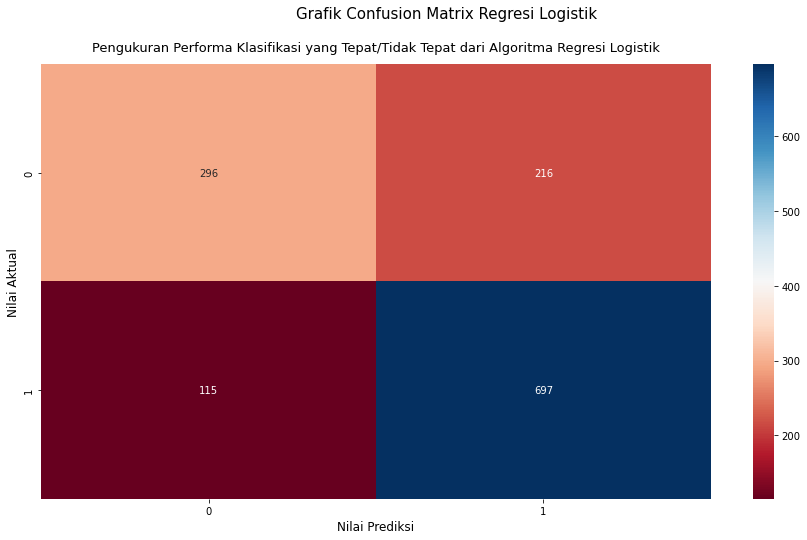

In [95]:
# Pengukuran performa dari hasil prediksi dengan data testing di algoritma Naive Bayes setelah dilatih dengan data training
plt.figure(figsize=(15, 8))

sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, cmap="RdBu", fmt=".0f")
plt.xlabel("Nilai Prediksi", fontsize=12)
plt.ylabel("Nilai Aktual", fontsize=12)
plt.suptitle("Grafik Confusion Matrix Regresi Logistik", fontsize=15)
plt.title("Pengukuran Performa Klasifikasi yang Tepat/Tidak Tepat dari Algoritma Regresi Logistik",
          fontsize=13, pad=13, loc="center")
plt.savefig("../Data Visualization/Confusion Matrix/Confusion Matrix untuk Algoritma Regresi Logistik.png")
plt.show()

Berikut adalah penjelasan dari grafik confusion matrix berdasarkan pelatihan sekaligus pengujian dengan Algoritma Regresi Logistik yang telah dilatih dengan data training ataupun data testing. Hasil tersebut merupakan hasil klasifikasi/prediksi yang dilakukan oleh data testing yang dimana data testing berfungsi untuk menguji Regresi Logistik karena sebelumnya algoritma tersebut sudah dilatih dengan data training. Berikut adalah penjelasan dari nilai-nilai pada grafik confusion matrix diatas:

1. Nilai 296 menunjukkan bahwa nilai tersebut adalah TRUE NEGATIVE (TN) yang merupakan data negatif yang berhasil di klasifikasikan dengan benar.
2. Nilai 697 menunjukkan bahwa nilai ini adalah TRUE POSITIVE (TP) yang merupakan data positif yang berhasil di klasifikasikan dengan benar.
3. Nilai 216 menunjukkan bahwa nilai tersebut merupakan FALSE POSITIVE (FP) yang merupakan data negatif namun diklasifikasikan/diprediksi sebagai hasil dari nilai yang positif.
4. Terakhir adalah nilai 115 yang menunjukkan bahwa nilai tersebut adalah FALSE NEGATIVE (FN) yang merupakan data positif namun diklasifikasikan/diprediksi sebagai hasil/output dari nilai negatif.


Sebagai catatan bahwa nilai 0 dan 1, baik yang ada di sumbu x (Nilai Prediksi) dan sumbu y (Nilai Aktual) adalah nilai negatif dan positif. Nilai negatif ditandai dengan angka 0 sedangkan nilai positif ditandai dengan angka 1. Untuk lebih jelasnya adalah seperti ini:

- 0: Nilai Negatif

- 1: Nilai Positif

Referensi:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
- https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [99]:
# Menampilkan performa berdasarkan nilai akurasi dari Algoritma Regresi Logistik
print("Nilai Akurasi dari Algoritma Regresi Logistik adalah", accuracy_score(y_test, pred_logistic_regression))

Nilai Akurasi dari Algoritma Regresi Logistik adalah 0.75


Berdasarkan hasil diatas telah diketahui bahwa final performance yang ditunjukkan oleh nilai akurasi dari Algoritma Regresi Logistik setelah algoritma tersebut dilatih dan diuji dengan sekumpulan data training dan data testing menghasilkan performa kinerja yang sudah cukup bagus yaitu 0.75. Itu artinya dengan proporsi persentase data pada saat proses split validation yang sebesar 70:30 dalam mengklasifikasikan nilai data dari kolom "Status" menggunakan Regresi Logistik dapat kita ketahui bahwasanya mayoritas pengklasifikasian data dengan data baru (data testing) yang dilakukan oleh Regresi Logistik sudah cukup baik walaupun terdapat beberapa kelasahan dalam memprediksi data baru tersebut.

Nilai 0.75 didapatkan melalui perhitungan rumus dari TP + TN / TP + TN + FP + FN. TP merupakan singkatan dari TRUE POSITIVE, TN singkatan dari TRUE NEGATIVE, FP singkatan dari FALSE POSITIVE dan FN singkatan dari FALSE NEGATIVE. Berdasarkan rumus diatas maka didapatkan perhitungan nilai seperti ini:

697 (TP) + 296 (TN) / 697 (TP) + 296 (TN) + 216 (FP) + 115 (FN) = 993 / 1.324 = 0.75.

Referensi perhitungan dan rumus:

- https://www.analyticsvidhya.com/blog/2021/05/in-depth-understanding-of-confusion-matrix/

Selanjutnya saya akan menampilkan nilai menggunakan ketiga metrics klasifikasi yang lain yaitu precision, recall, dan f1_score.

In [100]:
"""
Menampilkan nilai presisi, recall, dan f1_score metrics secara keseluruhan (bukan didasari oleh dua nilai
data dari kolom "Status") berdasarkan hasil prediksi yang telah dilakukan oleh Regresi Logistik dengan data testing
"""
print("--------------Nilai Presisi dari Algoritma Regresi Logistik--------------")
print(precision_score(y_test, pred_logistic_regression, average="weighted"), "\n")

print("--------------Nilai Recall dari Algoritma Regresi Logistik--------------")
print(recall_score(y_test, pred_logistic_regression, average="weighted"), "\n")

print("--------------Nilai F1_Score dari Algoritma Regresi Logistik--------------")
print(f1_score(y_test, pred_logistic_regression, average="weighted"))

--------------Nilai Presisi dari Algoritma Regresi Logistik--------------
0.7467028032501606 

--------------Nilai Recall dari Algoritma Regresi Logistik--------------
0.75 

--------------Nilai F1_Score dari Algoritma Regresi Logistik--------------
0.7436406173944448


Hasil diatas menunjukkan nilai pada ketiga metrics yang biasa digunakan di dalam pengujian klasifikasi machine learning (selain accuracy) yaitu precision, recall, dan f1_score. Ketiga metrics nilai tersebut bukan menunjukkan berdasarkan data negatif/positif seperti yang ditunjukkan pada grafik confusion matrix melainkan perhitungan secara keseluruhan dari final performance pada Algoritma Regresi Logistik dalam mengklasifikasikan data di dalam variabel dependen/variabel y.

Selain itu terdapat nilai average="weighted" pada precision_score, recall_score, dan f1_score. Nilai average="weighted" ini merupakan perhitungan metrik untuk setiap label/nilai data dengan menemukan pembobotan di nilai rata-rata dengan jumlah instance yang sebenarnya untuk setiap label data. Untuk melihat penjelasan lebih lengkap mengenai average="weighted" dapat dilihat melalui link berikut dan berfokus kepada Parameters:average:

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Selanjutnya saya akan menampilkan semua metrics seperti accuracy, precision, recall dan f1-score dengan menggunakan fungsi classification_report dari SKLearn.

In [96]:
"""
Menampilkan final performance (akurasi, presisi, dll) dari Algoritma
Regresi Logistik berdasarkan data pengujian (data testing)
"""

print("-------------------Hasil Prediksi untuk Algoritma Regresi Logistik-------------------")
print(classification_report(y_test, pred_logistic_regression))

-------------------Hasil Prediksi untuk Algoritma Naive Bayes-------------------
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       512
           1       0.76      0.86      0.81       812

    accuracy                           0.75      1324
   macro avg       0.74      0.72      0.72      1324
weighted avg       0.75      0.75      0.74      1324

